# Imports

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys  
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *

# Setup

In [2]:
OUTDIR = "/home/HPC/camontan/turchetti_paper/output/focused_scan/"

"/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5"

'/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5'

In [3]:
TUNES = ["scan_28_31_", "scan_168_201_"]
EXTENTS = [(0, 0.45, 0, 0.45), (0, 0.6, 0, 0.6)]
EPSILONS = ["epsilon_0d0_", "epsilon_32d0_", "epsilon_64d0_"]
MUS = ["mu_0d0_", "mu_0d25_", "mu_0d5_", "mu_0d75_", "mu_1d0_"]

SAMPLES_PER_SIDE = [300]

In [4]:
tune = TUNES[1]
EXTENT = EXTENTS[1]
epsilon = EPSILONS[1]
mu = MUS[0]
samples = SAMPLES_PER_SIDE[0]

In [5]:
f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")
f_rem = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_rem_rem.h5"), "r")
f_tune = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tune_default_tune.h5"), "r")
f_birkhoff = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

# Mask and ground truth

In [6]:
data = f_stab["stability"][:]
mask = np.log10(data)==8

In [7]:
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

In [8]:
gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))
ground_truth = np.log10(ground_truth_data) > gt_thesh

# Load lyapunov error

In [9]:
times = []
lyapunov_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_data.append(f_lyap[key]['lyapunov_error'][:])

# sort times and lyapunov data
times, lyapunov_data = zip(*sorted(zip(times, lyapunov_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_data = np.array(lyapunov_data)

In [10]:
lyapunov_thresholds = []
lyapunov_post_data = []
lyapunov_guesses = []
lyapunov_scores = []
for t, data in zip(times, lyapunov_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_post_data.append(data)
    lyapunov_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_thresholds[-1])
    lyapunov_guesses.append(guess)
    lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

# Load FLIs

In [20]:
times = []
fli_x_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_x_data.append(f_lyap[key]['fli_base_x'][:])

# sort times and lyapunov data
times, fli_x_data = zip(*sorted(zip(times, fli_x_data)))

# convert to numpy arrays
times = np.array(times)
fli_x_data = np.array(fli_x_data)

In [149]:
fli_x_thresholds = []
fli_x_post_data = []
fli_x_guesses = []
fli_x_scores = []
for t, data in zip(times, fli_x_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_x_post_data.append(data)

    fli_x_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_x_thresholds[-1])
    fli_x_guesses.append(guess)
    fli_x_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [150]:
times = []
fli_px_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_px_data.append(f_lyap[key]['fli_base_px'][:])

# sort times and lyapunov data
times, fli_px_data = zip(*sorted(zip(times, fli_px_data)))

# convert to numpy arrays
times = np.array(times)
fli_px_data = np.array(fli_px_data)

In [151]:
fli_px_thresholds = []
fli_px_post_data = []
fli_px_guesses = []
fli_px_scores = []
for t, data in zip(times, fli_px_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_px_post_data.append(data)

    fli_px_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_px_thresholds[-1])
    fli_px_guesses.append(guess)
    fli_px_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [152]:
times = []
fli_y_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_y_data.append(f_lyap[key]['fli_base_y'][:])

# sort times and lyapunov data
times, fli_y_data = zip(*sorted(zip(times, fli_y_data)))

# convert to numpy arrays
times = np.array(times)
fli_y_data = np.array(fli_y_data)

In [153]:
fli_y_thresholds = []
fli_y_post_data = []
fli_y_guesses = []
fli_y_scores = []
for t, data in zip(times, fli_y_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_y_post_data.append(data)

    fli_y_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_y_thresholds[-1])
    fli_y_guesses.append(guess)
    fli_y_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [154]:
times = []
fli_py_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_py_data.append(f_lyap[key]['fli_base_py'][:])

# sort times and lyapunov data
times, fli_py_data = zip(*sorted(zip(times, fli_py_data)))

# convert to numpy arrays
times = np.array(times)
fli_py_data = np.array(fli_py_data)

In [155]:
fli_py_thresholds = []
fli_py_post_data = []
fli_py_guesses = []
fli_py_scores = []
for t, data in zip(times, fli_py_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_py_post_data.append(data)

    fli_py_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_py_thresholds[-1])
    fli_py_guesses.append(guess)
    fli_py_scores.append(classify_data(ground_truth[mask], guess[mask]))

# Load GALI

In [156]:
times = []
gali_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    gali_data.append(f_lyap[key]['gali'][:])

# sort times and lyapunov data
times, gali_data = zip(*sorted(zip(times, gali_data)))

# convert to numpy arrays
times = np.array(times)
gali_data = np.array(gali_data)

In [157]:
gali_thresholds = []
gali_post_data = []
gali_guesses = []
gali_scores = []
for t, data in zip(times, gali_data):
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data = np.log10(data)
    data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
    data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
    gali_post_data.append(data)

    gali_thresholds.append(find_threshold(data[mask]))
    guess = (data < gali_thresholds[-1])
    gali_guesses.append(guess)
    gali_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log1

# Load FMA

In [9]:
f_tune['500000'].keys()

<KeysViewHDF5 ['1000000']>

In [10]:
times_fma = []
fma_fft_data = []
fma_birkhoff_data = []

for key in f_tune['0'].keys():
    if not key.isdigit():
        continue
    if not (key in f_tune):
        continue
    times_fma.append(int(key) * 2)
    
    fma_fft_data.append(np.sqrt(
        (f_tune['0'][key]['tune_x_fft'][:] - f_tune[key][str(int(key)*2)]['tune_x_fft'][:])**2 +
        (f_tune['0'][key]['tune_y_fft'][:] - f_tune[key][str(int(key)*2)]['tune_y_fft'][:])**2
    ))
    fma_birkhoff_data.append(np.sqrt(
        (f_tune['0'][key]['tune_x_birkhoff'][:] - f_tune[key][str(int(key)*2)]['tune_x_birkhoff'][:])**2 +
        (f_tune['0'][key]['tune_y_birkhoff'][:] - f_tune[key][str(int(key)*2)]['tune_y_birkhoff'][:])**2
    ))

# sort times_fma and lyapunov data
times_fma, fma_fft_data, fma_birkhoff_data = zip(*sorted(zip(times_fma, fma_fft_data, fma_birkhoff_data), key=lambda x: x[0]))

# convert to numpy arrays
times_fma = np.array(times_fma)
fma_fft_data = np.array(fma_fft_data)
fma_birkhoff_data = np.array(fma_birkhoff_data)

In [19]:
times_fma

array([     10,      12,      14,      18,      24,      30,      38,
            50,      62,      78,     100,     124,     158,     198,
           250,     316,     398,     500,     630,     794,    1000,
          1258,    1584,    1994,    2510,    3162,    3980,    5010,
          6308,    7942,   10000,   12588,   15848,   19952,   25118,
         31622,   39810,   50118,   63094,   79432,  100000,  125892,
        158488,  199526,  251188,  316226,  398106,  501186,  630956,
        794328, 1000000])

In [11]:
fma_fft_thresholds = []
fma_fft_post_data = []
fma_fft_guesses = []
fma_fft_scores = []
for t, data in zip(times_fma, fma_fft_data):
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data = np.log10(data)
    data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
    data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
    fma_fft_post_data.append(data)

    fma_fft_thresholds.append(find_threshold(data[mask]))
    guess = (data > fma_fft_thresholds[-1])
    fma_fft_guesses.append(guess)
    fma_fft_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_23233/702183706.py:7: RuntimeWarning: divide by zero encountered in log10
  data 

In [91]:
fma_birkhoff_thresholds = []
fma_birkhoff_post_data = []
fma_birkhoff_guesses = []
fma_birkhoff_scores = []
for t, data in zip(times_fma, fma_birkhoff_data):
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data = np.log10(data)
    data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
    data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
    fma_birkhoff_post_data.append(data)

    fma_birkhoff_thresholds.append(find_threshold(data[mask]))
    guess = (data > fma_birkhoff_thresholds[-1])
    fma_birkhoff_guesses.append(guess)
    fma_birkhoff_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7200/2256232091.py:7: RuntimeWarning: divide by zero encountered in log10
  data 

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by KMeans.

# Load fli+birkhoff

In [ ]:
times = []
lyapunov_nob_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_nob_data.append(f[key]['lyapunov_nob_x'][:])

# sort times and lyapunov_nob data
times, lyapunov_nob_data = zip(*sorted(zip(times, lyapunov_nob_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_nob_data = np.array(lyapunov_nob_data)

In [ ]:
lyapunov_nob_thresholds = []
lyapunov_nob_post_data = []
lyapunov_nob_guesses = []
lyapunov_nob_scores = []
for t, data in zip(times, lyapunov_nob_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_nob_post_data.append(data)
    lyapunov_nob_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_nob_thresholds[-1])
    lyapunov_nob_guesses.append(guess)
    lyapunov_nob_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [ ]:
times = []
lyapunov_b_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_b_data.append(f[key]['lyapunov_b_x'][:])

# sort times and lyapunov_b data
times, lyapunov_b_data = zip(*sorted(zip(times, lyapunov_b_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_b_data = np.array(lyapunov_b_data)

In [ ]:
lyapunov_b_thresholds = []
lyapunov_b_post_data = []
lyapunov_b_guesses = []
lyapunov_b_scores = []
for t, data in zip(times, lyapunov_b_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_b_post_data.append(data)
    lyapunov_b_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_b_thresholds[-1])
    lyapunov_b_guesses.append(guess)
    lyapunov_b_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_27723/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/

# Figure setup

In [ ]:
FIG_OUT = '/home/HPC/camontan/turchetti_paper/img'

Text(0, 0.5, 'accuracy')

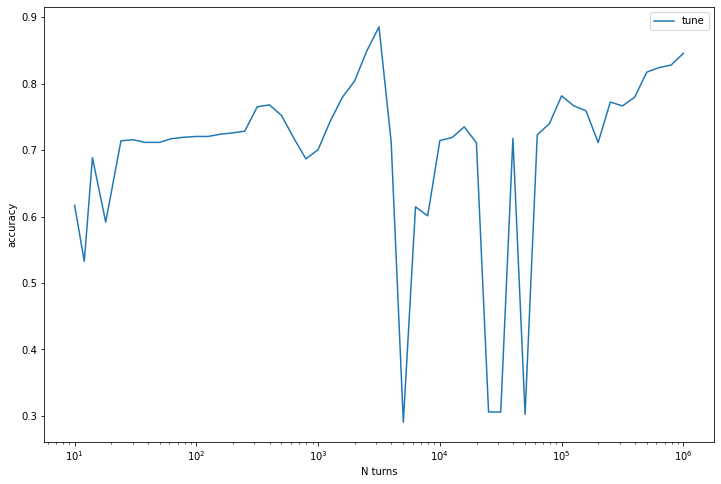

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(times_fma, [s["accuracy"] for s in fma_fft_scores], label="tune")
plt.xscale("log")

plt.legend()
plt.xlabel("N turns")
plt.ylabel("accuracy")

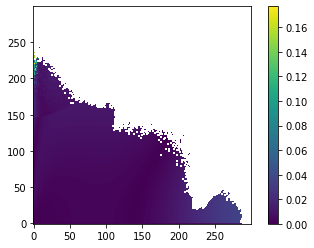

In [13]:
plt.imshow(fma_birkhoff_data[0].reshape(300, 300), origin="lower", cmap="viridis")
plt.colorbar()

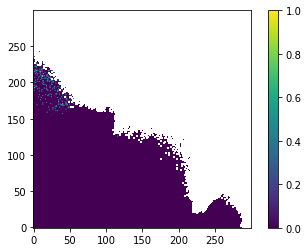

In [14]:
plt.imshow(fma_birkhoff_data[-1].reshape(300, 300), origin="lower", cmap="viridis")
plt.colorbar()

0.0 1.000001072384092


/tmp/ipykernel_7200/1799416032.py:5: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


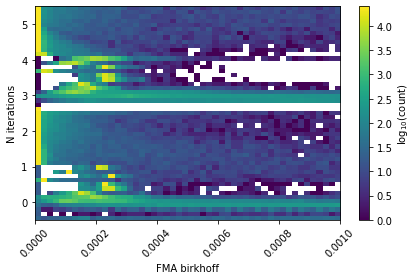

In [95]:
val_min, val_max = get_extents([l[mask] for l in fma_birkhoff_data], None)
print(val_min, val_max)
val_max = 0.001
tmp_data, bin_centers = compose_count_map([l[mask] for l in fma_birkhoff_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)

# tmp_data = tmp_data[14::7,:]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5])

# for i, threshold in enumerate(fma_birkhoff_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

plt.xticks(rotation=45)
# set labels in y axis
# plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("FMA birkhoff")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.tight_layout()

-15.954589770191003 1.8380683654698066e-06


/tmp/ipykernel_23233/3488693409.py:4: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


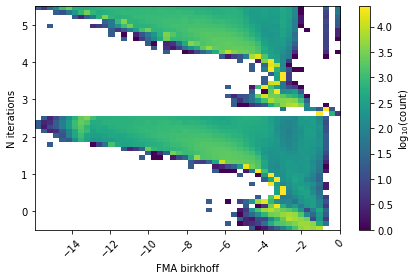

In [18]:
val_min, val_max = get_extents([l[mask] for l in fma_fft_post_data], None)
print(val_min, val_max)
tmp_data, bin_centers = compose_count_map([l[mask] for l in fma_fft_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)

# tmp_data = tmp_data[14::7,:]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times_fma[14::7])-0.5])

# for i, threshold in enumerate(fma_birkhoff_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

plt.xticks(rotation=45)
# set labels in y axis
# plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("FMA birkhoff")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.tight_layout()

In [96]:
times_fma[26]

3980

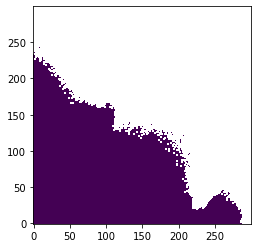

In [97]:
plt.imshow(fma_birkhoff_data[26].reshape(300, 300), origin="lower", cmap="viridis")

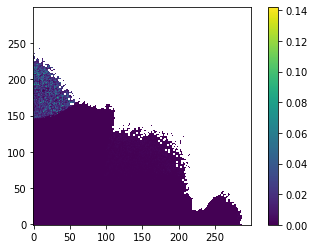

In [98]:
plt.imshow(fma_birkhoff_data[25].reshape(300, 300), origin="lower", cmap="viridis")
plt.colorbar()

In [76]:
np.array([np.count_nonzero(l[~np.isnan(l)]!=0.0) for l in fma_birkhoff_data])

array([39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098,
       39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098,
       39098, 39098, 39098, 39098, 39098, 39097, 39098, 39098,     0,
       39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098,
       39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098, 39098,
       39098, 39098, 39098, 39098, 39098, 39095])

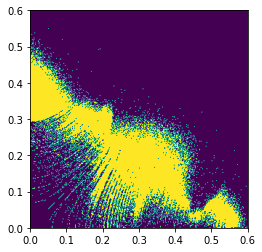

In [54]:
plt.imshow(fma_fft_guesses[-1].reshape(300, 300), extent=EXTENT, origin="lower")

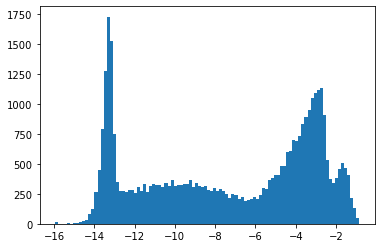

In [59]:
plt.hist(fma_birkhoff_post_data[-2], bins=100);

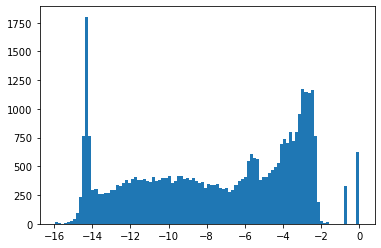

In [57]:
plt.hist(fma_fft_post_data[-1], bins=100);

Text(0.5, 1.0, 'FLI x at t = 1389')

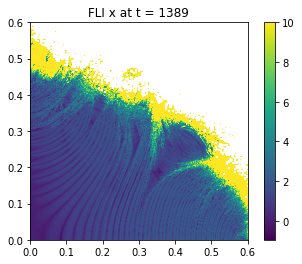

In [158]:
plt.imshow(fli_x_data[15].reshape(samples, samples), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI x at t = {}".format(times[15]))

Text(0.5, 1.0, 'FLI px at t = 1389')

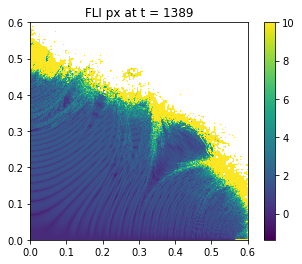

In [159]:
plt.imshow(fli_px_data[15].reshape(samples, samples), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI px at t = {}".format(times[15]))

Text(0.5, 1.0, 'FLI y at t = 1389')

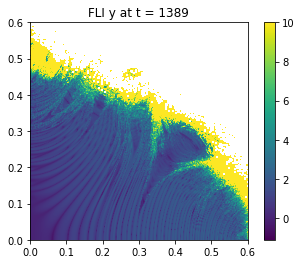

In [160]:
plt.imshow(fli_y_data[15].reshape(samples, samples), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI y at t = {}".format(times[15]))

In [161]:
times

array([       10,        13,        19,        26,        37,        51,
              71,       100,       138,       193,       268,       372,
             517,       719,      1000,      1389,      1930,      2682,
            3727,      5179,      7196,     10000,     13894,     19306,
           26826,     37275,     51794,     71968,    100000,    138949,
          193069,    268269,    372759,    517947,    719685,   1000000,
         1389495,   1930697,   2682695,   3727593,   5179474,   7196856,
        10000000,  13894954,  19306977,  26826957,  37275937,  51794746,
        71968567, 100000000])

Text(0.5, 1.0, 'FLI py at t = 10000')

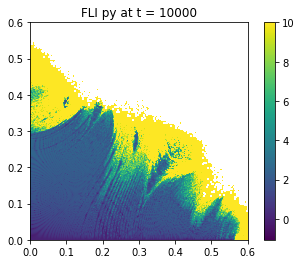

In [162]:
plt.imshow(fli_py_data[21].reshape(samples, samples), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI py at t = {}".format(times[21]))

Text(0.5, 1.0, 'LE at t = 10000')

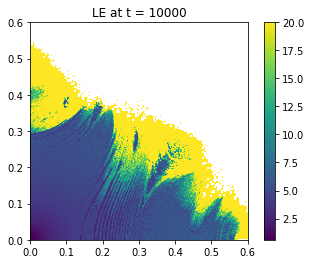

In [163]:
plt.imshow(np.log10(lyapunov_data[21]).reshape(samples, samples), extent=EXTENT, origin="lower", vmax=20)
plt.colorbar()
plt.title("LE at t = {}".format(times[21]))

Text(0, 0.5, 'accuracy')

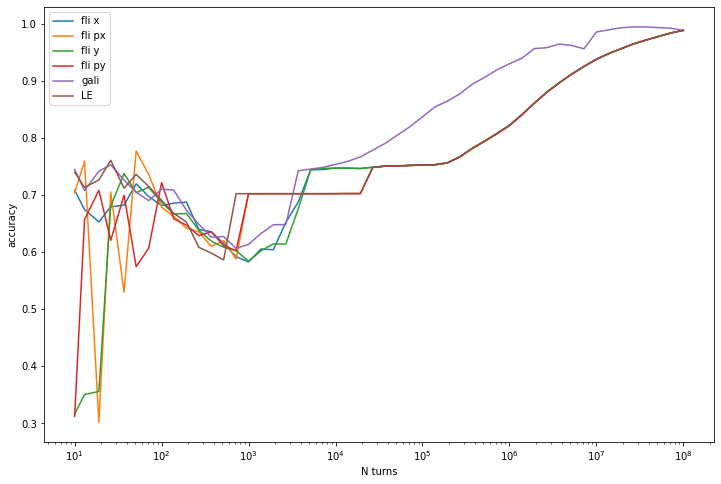

In [164]:
plt.figure(figsize=(12, 8))
plt.plot(times, [s["accuracy"] for s in fli_x_scores], label="fli x")
plt.plot(times, [s["accuracy"] for s in fli_px_scores], label="fli px")
plt.plot(times, [s["accuracy"] for s in fli_y_scores], label="fli y")
plt.plot(times, [s["accuracy"] for s in fli_py_scores], label="fli py")
plt.plot(times, [s["accuracy"] for s in gali_scores], label="gali")
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="LE")
plt.xscale("log")

plt.legend()
plt.xlabel("N turns")
plt.ylabel("accuracy")

Text(0.5, 1.0, 'FLI px N = 5179474')

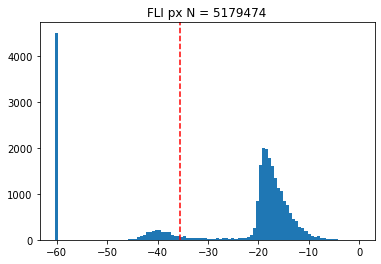

In [165]:
idx = -10
plt.hist(gali_post_data[idx][mask], bins=100, label="t = {}".format(times[idx]))
plt.axvline(gali_thresholds[idx], color="red", linestyle="--", label="threshold")
plt.title("FLI px N = {}".format(times[idx]))

In [166]:
times = []
rem_data = []

for key in f_rem.keys():
    if key == '0':
        continue
    # if key is not the string of an integer, skip
    if not key.isdigit():
        continue 
    times.append(int(key))
    rem_data.append(
        np.sqrt(
            (f_rem['0']['x'][:] - f_rem[key]['x'][:])**2+
            (f_rem['0']['px'][:] - f_rem[key]['px'][:])**2+
            (f_rem['0']['y'][:] - f_rem[key]['y'][:])**2+
            (f_rem['0']['py'][:] - f_rem[key]['py'][:])**2
        )
    )

# sort times and rem data
times, rem_data = zip(*sorted(zip(times, rem_data)))

# convert to numpy arrays
times = np.array(times)
rem_data = np.array(rem_data)

In [176]:
rem_thresholds = []
rem_post_data = []
rem_guesses = []
rem_scores = []
for t, data in zip(times, rem_data):
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    rem_post_data.append(data)
    rem_thresholds.append(find_threshold(data[mask]))
    guess = (data > rem_thresholds[-1])
    rem_guesses.append(guess)
    rem_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_9953/3063132538.py:6: RuntimeWarning: divide by zero encountered in log10
  data 

Text(0.5, 1.0, 'rem guess at time 100000000')

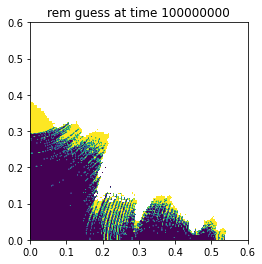

In [177]:
idx = -1
tmp_data = np.asarray(rem_guesses[idx], dtype=float)
tmp_data[~mask] = np.nan
plt.imshow(tmp_data.reshape(samples, samples), extent=EXTENT, origin="lower")
plt.title("rem guess at time {}".format(times[idx]))

Text(0.5, 1.0, 'LE guess at time 100000000')

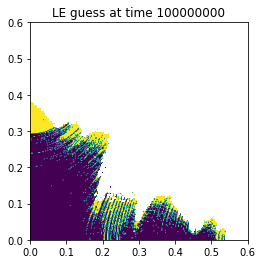

In [178]:
idx = -1
tmp_data = np.asarray(lyapunov_guesses[idx], dtype=float)
tmp_data[~mask] = np.nan
plt.imshow(tmp_data.reshape(samples, samples), extent=EXTENT, origin="lower")
plt.title("LE guess at time {}".format(times[idx]))

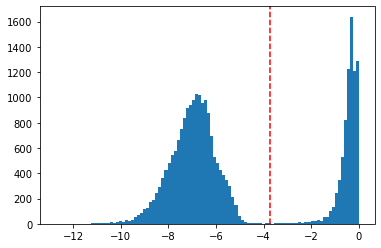

In [179]:
plt.hist(rem_post_data[idx], bins=100, label="t = {}".format(times[idx]))
plt.axvline(rem_thresholds[idx], color="red", linestyle="--", label="threshold")

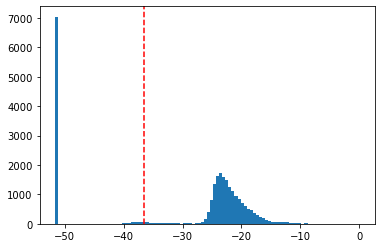

In [180]:
plt.hist(gali_post_data[idx], bins=100, label="t = {}".format(times[idx]))
plt.axvline(gali_thresholds[idx], color="red", linestyle="--", label="threshold")

In [181]:
rem_scores[idx]

{'total': 25386,
 'true_positive': 7553,
 'true_negative': 17534,
 'false_positive': 281,
 'false_negative': 18,
 'accuracy': 0.9882218545655086,
 'precision': 0.964130712279806,
 'recall': 0.9976225069343547,
 'f1': 0.980590717299578}

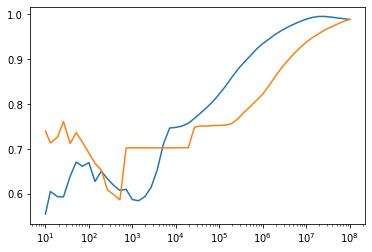

In [182]:
plt.plot(times, [s["accuracy"] for s in rem_scores], label="accuracy")
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="accuracy")
plt.xscale("log")

Text(0, 0.5, 'accuracy')

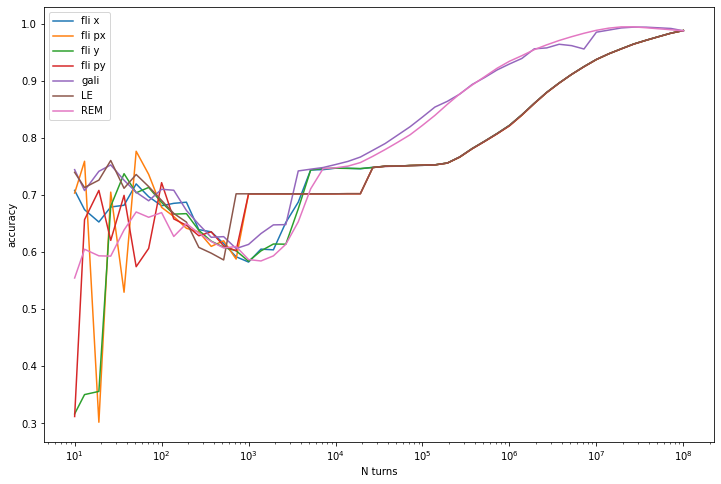

In [183]:
plt.figure(figsize=(12, 8))
plt.plot(times, [s["accuracy"] for s in fli_x_scores], label="fli x")
plt.plot(times, [s["accuracy"] for s in fli_px_scores], label="fli px")
plt.plot(times, [s["accuracy"] for s in fli_y_scores], label="fli y")
plt.plot(times, [s["accuracy"] for s in fli_py_scores], label="fli py")
plt.plot(times, [s["accuracy"] for s in gali_scores], label="gali")
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="LE")
plt.plot(times, [s["accuracy"] for s in rem_scores], label="REM")
plt.xscale("log")

plt.legend()
plt.xlabel("N turns")
plt.ylabel("accuracy")

In [174]:
plt.imshow(np.log10(rem_data[-1]).reshape(200,200), extent=EXTENT, origin="lower")

plt.colorbar()

/tmp/ipykernel_9953/2450744138.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(rem_data[-1]).reshape(200,200), extent=EXTENT, origin="lower")


ValueError: cannot reshape array of size 90000 into shape (200,200)

/tmp/ipykernel_9953/3662728481.py:1: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(rem_data[-1])


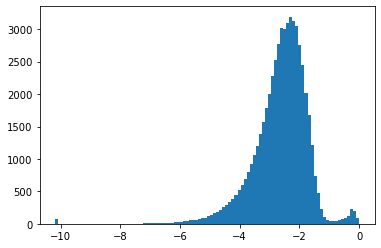

In [ ]:
tmp_data = np.log10(rem_data[-1])
tmp_data[np.isnan(tmp_data)] = np.nanmin(tmp_data[~np.isnan(tmp_data)])
tmp_data[np.isinf(tmp_data)] = np.nanmin(tmp_data[~np.isinf(tmp_data)])
plt.hist(tmp_data[mask], bins=100);

In [ ]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_post_data], None)
print(val_min, val_max)

0.6020599913277545 308.2496486507455


0.6020599913277545 308.2496486507455


/tmp/ipykernel_7200/3185245285.py:4: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


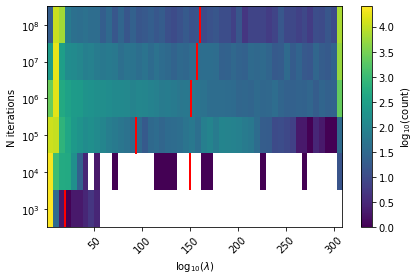

In [ ]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_post_data], None)
print(val_min, val_max)
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)

tmp_data = tmp_data[14::7,:]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5])

for i, threshold in enumerate(lyapunov_thresholds[14::7]):
    plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\log_{10}(\lambda)$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.tight_layout()

308.03190473103876

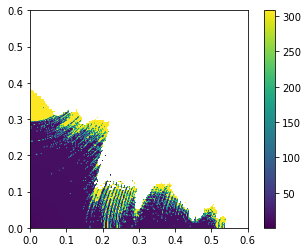

In [ ]:
tmp_data = lyapunov_post_data[-1]
tmp_data[~mask] = np.nan
plt.imshow(tmp_data.reshape(samples, samples), origin='lower', extent=EXTENT)
plt.colorbar()
np.nanmax(tmp_data[mask])

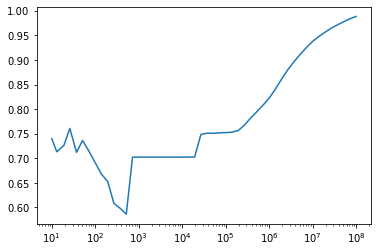

In [ ]:
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="accuracy")
plt.xscale("log")

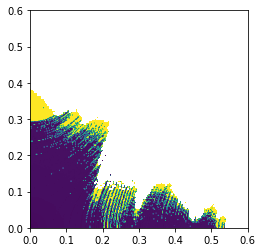

In [ ]:
plt.imshow(ground_truth_data.reshape(samples, samples), extent=EXTENT, origin="lower")

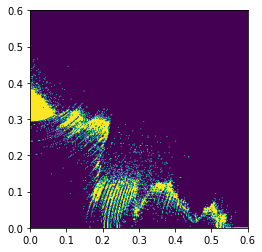

In [ ]:
plt.imshow(guess.reshape(samples, samples), extent=EXTENT, origin="lower")

Text(0.5, 1.0, 'Lyapunov guess at time 37275')

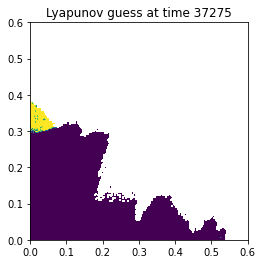

In [ ]:
idx = 25
tmp_data = np.asarray(lyapunov_guesses[idx], dtype=float)
tmp_data[~mask] = np.nan
plt.imshow(tmp_data.reshape(samples, samples), extent=EXTENT, origin="lower")
plt.title("Lyapunov guess at time {}".format(times[idx]))

(array([5.0200e+02, 5.1560e+03, 1.4802e+04, 1.8960e+03, 4.7600e+02,
        2.9200e+02, 1.7000e+02, 1.5600e+02, 1.3800e+02, 1.0500e+02,
        9.5000e+01, 8.4000e+01, 7.8000e+01, 4.1000e+01, 5.0000e+01,
        4.5000e+01, 3.0000e+01, 3.5000e+01, 4.1000e+01, 3.1000e+01,
        3.0000e+01, 3.8000e+01, 2.5000e+01, 3.8000e+01, 3.5000e+01,
        4.0000e+01, 5.8000e+01, 5.3000e+01, 5.8000e+01, 5.7000e+01,
        8.5000e+01, 8.1000e+01, 6.2000e+01, 7.4000e+01, 6.4000e+01,
        5.3000e+01, 5.4000e+01, 5.4000e+01, 5.3000e+01, 2.5000e+01,
        2.5000e+01, 1.6000e+01, 1.2000e+01, 1.2000e+01, 1.4000e+01,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

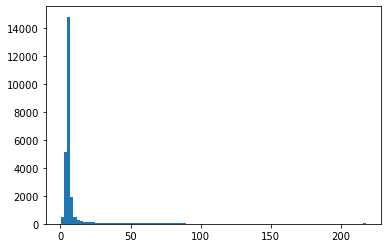

In [ ]:
find_threshold(lyapunov_post_data[idx][mask])
np.max(lyapunov_post_data[idx][mask])
plt.hist(lyapunov_post_data[idx][mask], bins=100, label="t = {}".format(times[idx]))

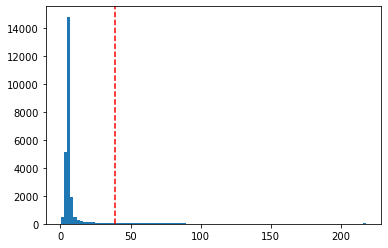

In [ ]:
plt.hist(lyapunov_post_data[idx][mask], bins=100, label="t = {}".format(times[idx]))
plt.axvline(lyapunov_thresholds[idx], color="red", linestyle="--", label="threshold")

Text(0.5, 1.0, 'Lyapunov guess at time 26826957')

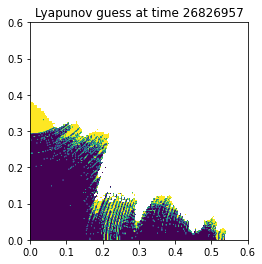

In [ ]:
idx = -5
tmp_data = np.asarray(lyapunov_guesses[idx], dtype=float)
tmp_data[~mask] = np.nan
plt.imshow(tmp_data.reshape(samples, samples), extent=EXTENT, origin="lower")
plt.title("Lyapunov guess at time {}".format(times[idx]))

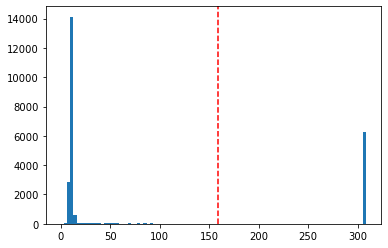

In [ ]:
plt.hist(lyapunov_post_data[idx][mask], bins=100, label="t = {}".format(times[idx]))
plt.axvline(lyapunov_thresholds[idx], color="red", linestyle="--", label="threshold")

In [ ]:
f_lyap[key].keys()

<KeysViewHDF5 ['px', 'py', 'x', 'y']>